In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile #Chorus


Signal shape: (408226,)
Signal Datatype: int16
Signal duration: 51.03 seconds


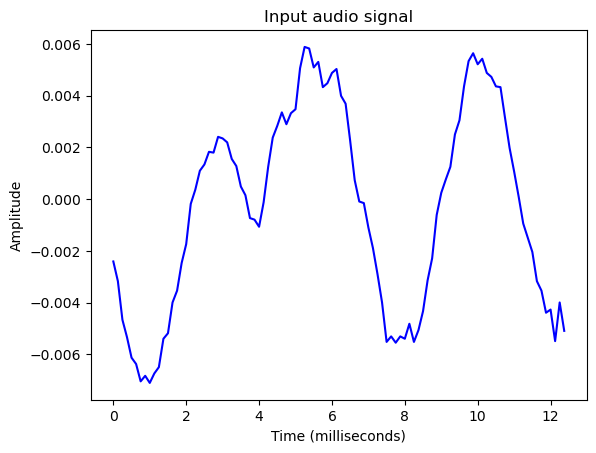

In [32]:
frequency_sampling, audio_signal = wavfile.read(r"C:\Users\ROG\Downloads\male.wav")
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
audio_signal = audio_signal / np.power(2, 15)
signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(frequency_sampling)
plt.plot(time_axis, signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

Signal shape: (408226,)
Signal Datatype: float64
Signal duration: 51.03 seconds


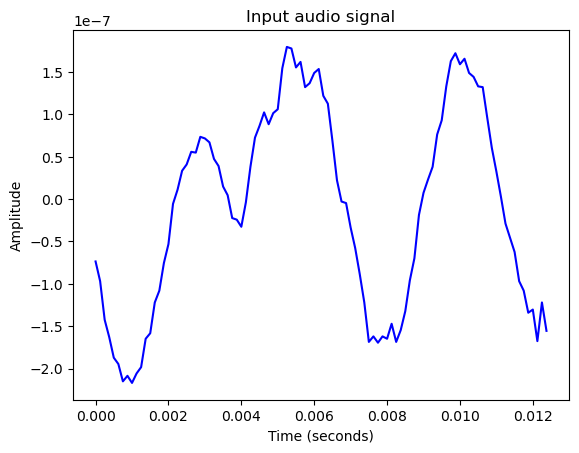

In [35]:
# Print the signal information
print('Signal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / float(frequency_sampling), 2), 'seconds')

# Normalize the audio signal
audio_signal = audio_signal / np.power(2, 15)

# Take a portion of the signal (first 100 samples)
signal = audio_signal[:100]

# Create the time axis for plotting (in seconds)
time_axis = np.arange(0, len(signal), 1) / float(frequency_sampling)

# Plot the signal
plt.plot(time_axis, signal, color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()


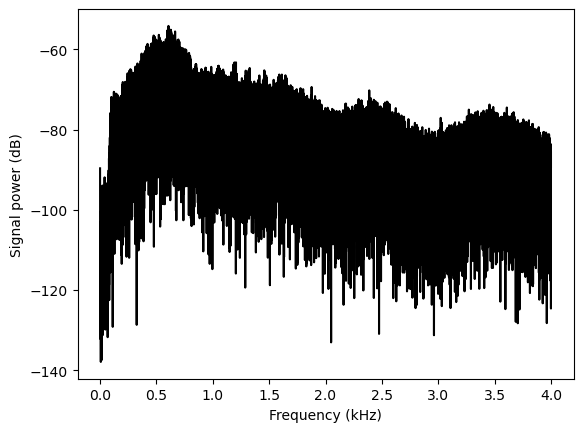

In [33]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(int)
signal_frequency = np.fft.fft(audio_signal)
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2
len_fts = len(signal_frequency)
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2
signal_power = 10 * np.log10(signal_frequency)
len_half = int(np.ceil((len(audio_signal) + 1) / 2.0))
x_axis = np.arange(0, len_half, 1) * (frequency_sampling / length_signal) / 1000.0
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

In [34]:
import speech_recognition as sr

# Create a recognizer object
recognizer = sr.Recognizer()

# Specify the absolute path to the WAV file[male,F_1116_9y6m_1,hidk,Sports,eng_f6,f_m6]
wav_file_path = r"C:\Users\ROG\Downloads\male.wav"

# Read the WAV file and perform speech recognition
with sr.AudioFile(wav_file_path) as source:
    audio = recognizer.record(source)  # Read the entire audio file

    try:
        # Use the ASR engine to recognize speech
        text = recognizer.recognize_google(audio)
        print("You said:", text)
    except sr.UnknownValueError:
        print("Speech recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from the speech recognition service:", str(e))


You said: what is summary decides to break a be careful that you keep a liquid coverage but look for places to save money maybe it's taking longer to get things quite way then the bank is expected hiring the life for one's company mein winter tax retirement income the British officer can you when the title of this type of song is in question paper standard
